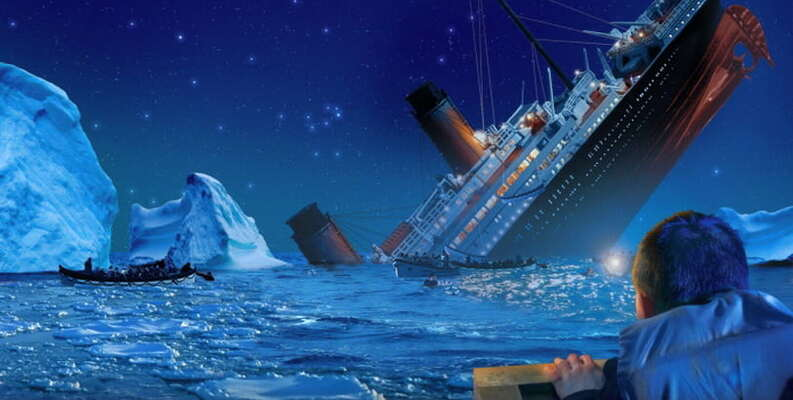

##  Author: Priya Chakradhari

## Focus: Exploratory Data Analysis & Machine Learning  

## "This notebook examines key factors influencing passenger survival on the Titanic using exploratory data analysis and machine learning techniques."

## LinkedIn: https://www.linkedin.com/in/priya-chakradhari/

## Github: https://github.com/priyachakradhari

## Twitter(X): https://x.com/PriyaChakr87701



# Meta data (Data about the data)

# 1. Data Explore

##  - Import Libraries

In [ ]:
# import Libraries

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('titanic')
df.head()

## - Shape of the data

In [ ]:
df.shape

## - Information about the data

In [ ]:
df.info()

## - Stats of the data

In [ ]:
df.describe()

## - Check Missing Value

In [ ]:
df.isnull().sum().sort_values(ascending = False)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.title("Missing Value")
plt.show()

# 2. Data Cleaning

In [ ]:
# Drop the columns deck 
df = df.drop(['deck'], axis = 1)

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

In [ ]:
df.isnull().sum().sort_values(ascending = False)

In [ ]:
# check the value count 
df['embark_town'].value_counts()

In [ ]:
df['embark_town'].mode()[0]

In [ ]:
# Fillna using mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
# Fillna using mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df.isnull())
plt.title("Missing Value")
plt.show()

# 3. EDA 

## - Univariate Analysis

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['sex'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.kdeplot(df['age'], fill=True, color = '#F44537')
plt.title("Age Density Plot")
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['sibsp'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['parch'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(x = df['fare'], data = df, kde = True, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['embarked'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['class'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['who'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['adult_male'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
df['embarked'].value_counts().plot(kind = 'bar', color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['alive'], data = df, color = '#F44537')
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['alone'], data = df, color = '#F44537')
plt.show()

## - Bivariate Analysis

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'pclass', y = 'age',data  = df)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Sex")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'pclass', hue = 'survived', data = df)
plt.title("Survival by PClass")
plt.show()

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'class', hue = 'survived',data = df)
plt.title("Survived by Class")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['who'], hue = 'survived', data =df)
plt.title("Survived by who")
plt.show()

# 4. Feature Engineering

In [ ]:
# Age group 

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [ ]:
df['age_group'].value_counts()

**Family size logic:**

What each column actually means

**sibsp** = number of siblings + spouses traveling with the passenger

**parch** = number of parents + children traveling with the passenger

Both numbers exclude the passenger themself. That’s the key detail people miss.

Why we add + 1

The + 1 counts the **passenger**.

In [ ]:
df['family_size'] = df['sibsp'] + df['parch'] +1

In [ ]:
df.drop(['age', 'sibsp', 'parch'], axis = 1,inplace = True)

In [ ]:
df.drop(
    columns=['alive', 'class', 'who', 'adult_male', 'alone'],
    inplace=True
)

# 5. Feature Encoding

## - Binary encoding

In [ ]:
df['sex'] = df['sex'].map({'male':1, 'female':0})

## - One-Hot Encoding

In [ ]:

df = pd.get_dummies(
    df,
    columns=['embarked', 'embark_town', 'age_group'],
    drop_first=True
)


# 6. Train Test split

In [ ]:
X = df.drop(['survived'], axis = 1)
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

In [ ]:
# model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
